<h1 style='text-align: center;'> Aula Invertida 1: Estadística Descriptiva </h1>

Analizar y comprender, utilizando la estadistica descriptiva los datos de la fifa y de la prueba (datos del empleo dentro del Ecuador), además de implementar graficos que corroboren los resultado encontrados.

Finalmente, agregar concluciones y recomedaciones al trabajo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Análisis FIFA

In [2]:
# Fifa
fifa_dataset = pd.read_csv('./datasets/fifa_datos.csv', header=0)
fifa_dataset = fifa_dataset.drop(['Unnamed: 0','ID','Name','Photo','Flag','Club Logo','Jersey Number','Real Face'], axis=1)
fifa_dataset.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Información general
fifa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Value                     18207 non-null  object 
 6   Wage                      18207 non-null  object 
 7   Special                   18207 non-null  int64  
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Weak Foot                 18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Body Type                 18159 non-null  object 
 14  Positi

In [4]:
# Descripción general
fifa_dataset.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
# Correlacion
fifa_dataset.corr()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Age,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,0.130545,0.068660,0.147183,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,0.394972,0.332515,0.340776,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,0.246319,0.243355,0.200988,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,0.866417,0.724244,0.644421,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,0.191770,0.178373,0.157483,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,0.307925,0.357416,0.183238,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,0.741035,0.743439,0.443005,...,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Crossing,0.130545,0.394972,0.246319,0.866417,0.191770,0.307925,0.741035,1.000000,0.655300,0.469507,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539
Finishing,0.068660,0.332515,0.243355,0.724244,0.178373,0.357416,0.743439,0.655300,1.000000,0.473427,...,0.837827,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913
HeadingAccuracy,0.147183,0.340776,0.200988,0.644421,0.157483,0.183238,0.443005,0.469507,0.473427,1.000000,...,0.551978,0.507208,0.583123,0.561063,0.533643,-0.750417,-0.749888,-0.746444,-0.744443,-0.748895


<AxesSubplot:>

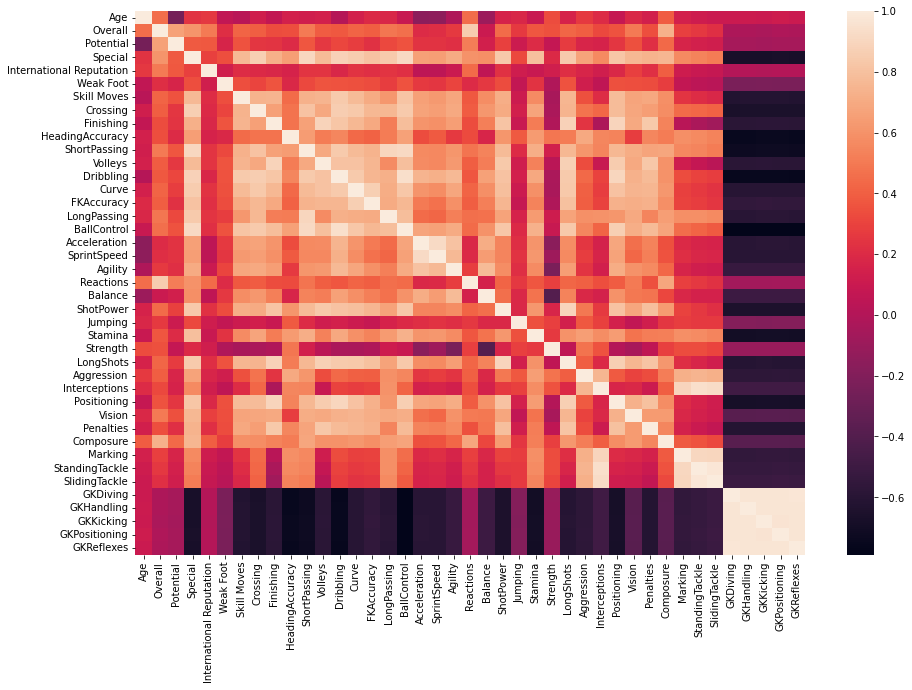

In [6]:
# Mapa de calor
plt.subplots(figsize=(15,10)) 
sns.heatmap(fifa_dataset.corr())

### Análisis Grupos Económicos Ecuador

In [7]:
# Grupos económicos Ecuador
grupos_dataset = pd.read_excel('./datasets/GruposEconomicos.xlsx', header=4)
grupos_dataset.head()

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN


In [8]:
# Información general
grupos_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 40 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Ranking 
(1) Tamaño  2021                                                                                     315 non-null    object 
 1   Ranking 
(1) Tamaño  2020                                                                                     302 non-null    float64
 2   Variación Ranking Tamaño 2020 - 2021                                                                          302 non-null    float64
 3   NUEVO
GE                                                                                                      50 non-null     object 
 4   
Nombre Grupo Económico                                 

In [9]:
# Descripción general
grupos_dataset.describe()

,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),Sociedades \nNacionales (c),Sociedades \nExtranjeras (d),Contribuyentes\n Especiales,Grandes \nContribuyentes e \nImportancia \nRecaudatoria,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
count,302.000000,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,1.0
mean,151.500000,0.000000,3.003300,2.613861,7.069307,2.217822,39.544554,11.062706,7.386139,2.435644,...,4.076260e+05,1.512046e+05,1.447792e+05,8.666017e+08,8.488488e+08,3.141654e+08,3.075412e+08,3.643370e+07,4.042244e+07,0.0
std,87.324109,14.639182,26.387898,23.125902,61.468550,19.462277,344.081334,96.641685,64.275685,21.195752,...,3.573969e+06,1.470556e+06,1.389845e+06,7.632850e+09,7.470386e+09,2.746678e+09,2.689186e+09,3.204688e+08,3.553322e+08,NaN
min,1.000000,-85.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.258247e+06,5.761201e+06,-2.462531e+07,-5.790622e+06,2.530000e+02,2.630000e+02,0.0
25%,76.250000,-5.750000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,...,4.785650e+02,0.000000e+00,0.000000e+00,6.283528e+07,6.591704e+07,2.529118e+07,2.371852e+07,1.698178e+06,2.069227e+06,0.0
50%,151.500000,1.000000,0.000000,0.000000,2.000000,0.000000,13.000000,2.000000,2.000000,1.000000,...,1.654349e+04,0.000000e+00,0.000000e+00,1.381787e+08,1.440114e+08,5.515283e+07,5.398364e+07,5.099821e+06,6.119566e+06,0.0
75%,226.750000,7.750000,1.000000,0.000000,5.000000,1.000000,24.000000,6.000000,4.000000,1.000000,...,1.156632e+05,0.000000e+00,0.000000e+00,3.574288e+08,3.574384e+08,1.513844e+08,1.499963e+08,1.143406e+07,1.489997e+07,0.0
max,302.000000,49.000000,455.000000,396.000000,1071.000000,336.000000,5991.000000,1676.000000,1119.000000,369.000000,...,6.175535e+07,2.290750e+07,2.193405e+07,1.312902e+11,1.286006e+11,4.759606e+10,4.659249e+10,5.519706e+09,6.124000e+09,0.0


In [10]:
# Correlacion
grupos_dataset.corr()

,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),Sociedades \nNacionales (c),Sociedades \nExtranjeras (d),Contribuyentes\n Especiales,Grandes \nContribuyentes e \nImportancia \nRecaudatoria,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
Ranking \n(1) Tamaño 2020,1.000000,0.083821,-0.269652,-0.228743,-0.212931,-0.214241,-0.391660,-0.326254,-0.422756,-0.574845,...,-0.327911,-0.180576,-0.193799,-0.397270,-0.406443,-0.515890,-0.510426,-0.409314,-0.410234,NaN
Variación Ranking Tamaño 2020 - 2021,0.083821,1.000000,-0.037331,-0.008270,-0.012513,-0.012018,0.021413,-0.057249,-0.044845,-0.087162,...,-0.024856,0.007613,0.007461,0.013523,0.000615,0.025729,0.010224,-0.010183,-0.027013,NaN
No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),-0.269652,-0.037331,1.000000,0.984697,0.987176,0.987312,0.991365,0.996213,0.991875,0.991703,...,0.986075,0.884570,0.897068,0.980431,0.981483,0.986397,0.986655,0.978975,0.980168,NaN
No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),-0.228743,-0.008270,0.984697,1.000000,0.981568,0.977719,0.984923,0.986422,0.986000,0.986262,...,0.981709,0.875291,0.887497,0.972589,0.973712,0.980402,0.980732,0.969372,0.970883,NaN
Personas \nNaturales (a),-0.212931,-0.012513,0.987176,0.981568,1.000000,0.985860,0.997844,0.990931,0.996825,0.995782,...,0.988220,0.890645,0.902677,0.983801,0.984582,0.991474,0.991333,0.983659,0.984382,NaN
Personas \nExtranjeras (b),-0.214241,-0.012018,0.987312,0.977719,0.985860,1.000000,0.988261,0.992530,0.989410,0.990174,...,0.985378,0.884895,0.896404,0.977158,0.978051,0.983859,0.983970,0.976834,0.978059,NaN
Sociedades \nNacionales (c),-0.391660,0.021413,0.991365,0.984923,0.997844,0.988261,1.000000,0.994324,0.999166,0.997758,...,0.991000,0.893431,0.906175,0.988342,0.989092,0.994482,0.994489,0.986456,0.987520,NaN
Sociedades \nExtranjeras (d),-0.326254,-0.057249,0.996213,0.986422,0.990931,0.992530,0.994324,1.000000,0.995499,0.995868,...,0.989868,0.887913,0.900227,0.984438,0.985475,0.991294,0.991429,0.985280,0.986109,NaN
Contribuyentes\n Especiales,-0.422756,-0.044845,0.991875,0.986000,0.996825,0.989410,0.999166,0.995499,1.000000,0.998595,...,0.992028,0.891369,0.903661,0.987703,0.988596,0.994580,0.994624,0.986403,0.987454,NaN
Grandes \nContribuyentes e \nImportancia \nRecaudatoria,-0.574845,-0.087162,0.991703,0.986262,0.995782,0.990174,0.997758,0.995868,0.998595,1.000000,...,0.992833,0.892361,0.904597,0.988756,0.989670,0.995525,0.995607,0.988462,0.989276,NaN


<AxesSubplot:>

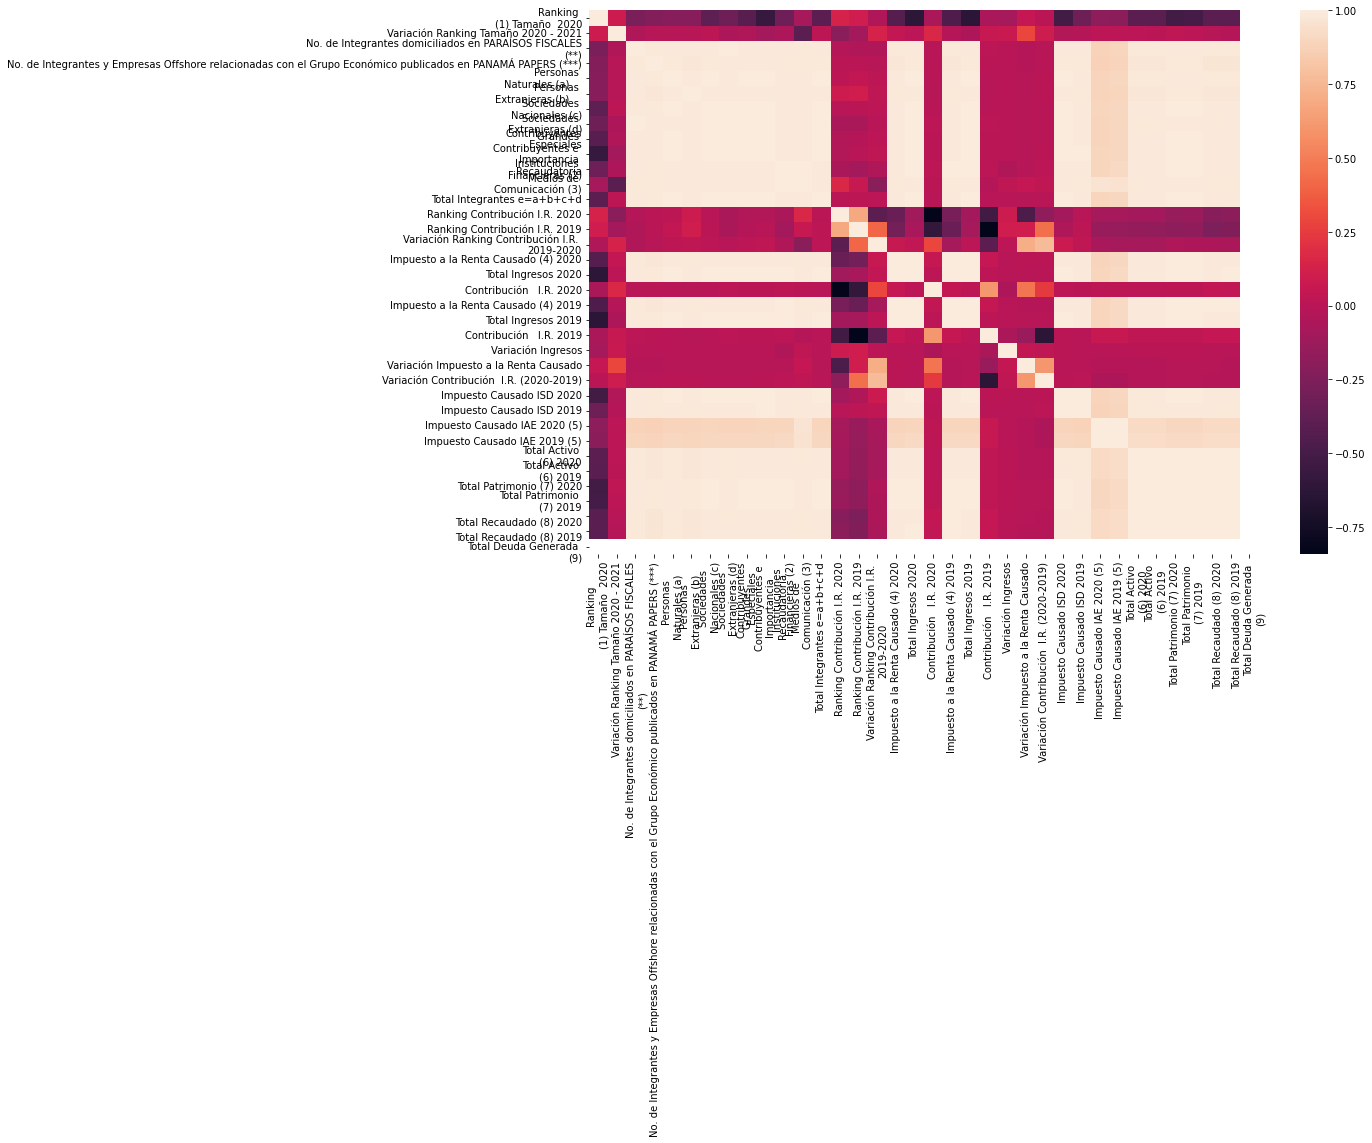

In [11]:
# Mapa de calor
plt.subplots(figsize=(15,10)) 
sns.heatmap(grupos_dataset.corr())

### Conclusiones y recomendaciones

1. El análisis descriptivo nos permite obtener una idea clara sobre la calidad de datos que tenemos y hasta puede determinar la continuidad o no de un proyecto. La gran cantidad de datos que estamos generando continuamente hace necesario tener herramientas potentes que permitan sacar el máximo provecho de ellos.
